In [21]:
# Make all plots inline.
%matplotlib inline 

# Import dependencies
import folium
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from IPython.core.display import display

In [ ]:
# Load accident data.
accident_data = pd.read_csv('./data/NYPD_Motor_Vehicle_Collisions_sampled.csv')

In [2]:
accident_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/18/2016,5:20,BRONX,10456,40.824067,-73.908710,"(40.8240665, -73.9087095)",EAST 163 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3463614,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,06/18/2016,7:10,BRONX,10472,40.826916,-73.872030,"(40.8269163, -73.8720302)",METCALF AVENUE,WATSON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3464214,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,06/18/2016,7:20,NaN,NaN,40.701455,-73.989620,"(40.7014547, -73.9896203)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3463782,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,06/18/2016,7:30,NaN,NaN,NaN,NaN,NaN,47 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3465413,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN
4,06/18/2016,7:45,QUEENS,11422,40.665256,-73.735334,"(40.665256, -73.7353338)",SOUTH CONDUIT AVENUE,FRANCIS LEWIS BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3463318,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [3]:
accident_data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,6395.000000,6687.000000,6687.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
mean,10846.141048,40.723501,-73.917075,0.253500,0.000900,0.057600,0.000600,0.013900,0,0.206300,0.000400,3554134.235000
std,554.570810,0.079065,0.086132,0.625361,0.029988,0.260939,0.024489,0.131562,0,0.702417,0.024493,127228.305605
min,10000.000000,40.504925,-74.247136,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,125912.000000
25%,10309.000000,40.667784,-73.974463,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,3525040.500000
50%,11207.000000,40.721536,-73.926085,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,3586995.000000
75%,11238.000000,40.767516,-73.861872,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,3605235.250000
max,11697.000000,40.912295,-73.700597,12.000000,1.000000,6.000000,1.000000,3.000000,0,14.000000,2.000000,3612908.000000


In [4]:
# Num rows in data.
print(accident_data.count())

DATE                             10000
TIME                             10000
BOROUGH                           6396
ZIP CODE                          6395
LATITUDE                          6687
LONGITUDE                         6687
LOCATION                          6687
ON STREET NAME                    6610
CROSS STREET NAME                 5197
OFF STREET NAME                   2174
NUMBER OF PERSONS INJURED        10000
NUMBER OF PERSONS KILLED         10000
NUMBER OF PEDESTRIANS INJURED    10000
NUMBER OF PEDESTRIANS KILLED     10000
NUMBER OF CYCLIST INJURED        10000
NUMBER OF CYCLIST KILLED         10000
NUMBER OF MOTORIST INJURED       10000
NUMBER OF MOTORIST KILLED        10000
CONTRIBUTING FACTOR VEHICLE 1     9950
CONTRIBUTING FACTOR VEHICLE 2     8320
CONTRIBUTING FACTOR VEHICLE 3      700
CONTRIBUTING FACTOR VEHICLE 4      196
CONTRIBUTING FACTOR VEHICLE 5       40
UNIQUE KEY                       10000
VEHICLE TYPE CODE 1               9779
VEHICLE TYPE CODE 2      

In [5]:
# Map data.

# Starting coordinates to load map view.
NYC_coordinates = (40.7142700, -74.0059700)

# Create Map object.
map = folium.Map(location=NYC_coordinates,
                     zoom_start=12)

# Creating different tile layers 
cycle_tile = folium.TileLayer(tiles = 'http://b.tile.opencyclemap.org/cycle/{z}/{x}/{y}.png', attr='Attributed').add_to(map)
cycle_tile.layer_name = 'Cycling Route Map'

# Create a feature group for controlling multiple aspects

col_group = folium.FeatureGroup(name='Collisions').add_to(map)
injury_group = folium.FeatureGroup(name='Injuries').add_to(map)


# Plot accidents.
# Limit number of points to plot for testing.
MAX_RECORDS = 1000
collision_cluster = folium.MarkerCluster().add_to(col_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE'])):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Reason</strong>: {2}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['CONTRIBUTING FACTOR VEHICLE 1']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='red', icon='asterisk'),
                popup=popup).add_to(collision_cluster)

# Create new cluster group for cyclist injuries
bike_cluster = folium.MarkerCluster().add_to(injury_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE']) and row[1]['NUMBER OF CYCLIST INJURED'] >= 1 or row[1]['NUMBER OF CYCLIST KILLED'] >= 1):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Cyclists Injured</strong>: {2}</li>
                    <li><strong>Cyclists Killed</strong>: {3}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['NUMBER OF CYCLIST INJURED']), str(row[1]['NUMBER OF CYCLIST KILLED']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='blue', icon='asterisk'),
                popup=popup).add_to(bike_cluster)
        
# Create new cluster group for pedestrian injuries
ped_cluster = folium.MarkerCluster().add_to(injury_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE']) and row[1]['NUMBER OF PEDESTRIANS INJURED'] >= 1 or row[1]['NUMBER OF PEDESTRIANS KILLED'] >= 1):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Pedestrians Injured</strong>: {2}</li>
                    <li><strong>Pedestrians Killed</strong>: {3}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['NUMBER OF PEDESTRIANS INJURED']), str(row[1]['NUMBER OF PEDESTRIANS KILLED']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='green', icon='asterisk'),
                popup=popup).add_to(ped_cluster)

# Create new cluster group for automobile injuries
auto_cluster = folium.MarkerCluster().add_to(injury_group)
for row in accident_data[0:MAX_RECORDS].iterrows():
    # Only plot point if lat/long is available.
    if (not np.isnan(row[1]['LATITUDE']) and not np.isnan(row[1]['LONGITUDE']) and row[1]['NUMBER OF MOTORIST INJURED'] >= 1 or row[1]['NUMBER OF MOTORIST KILLED'] >= 1):
        accident_metadata = """
                <ul>
                    <li><strong>On street</strong>: {0}</li>
                    <li><strong>Cross street</strong>: {1}</li>
                    <li><strong>Motorists Injured</strong>: {2}</li>
                    <li><strong>Motorists Killed</strong>: {3}</li>
                </ul>""".format(
            str(row[1]['ON STREET NAME']), str(row[1]['CROSS STREET NAME']),
            str(row[1]['NUMBER OF MOTORIST INJURED']), str(row[1]['NUMBER OF MOTORIST KILLED']))
        iframe = folium.element.IFrame(html=accident_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
                location = [row[1]['LATITUDE'], row[1]['LONGITUDE']],
                icon = folium.Icon(color='red', icon='asterisk'),
                popup=popup).add_to(auto_cluster)
        
# layer names for items separately        
# collision_cluster.layer_name = 'Collisions'
# bike_cluster.layer_name = 'Cyclist Injuries'
# ped_cluster.layer_name = 'Pedestrian Injuries'


folium.LayerControl().add_to(map)
map

In [ ]:
# Save html version of map.
map.save('accidents_map.html')

# New Aggregate Intersection Counts

In [3]:
# Load pickle files containing aggregate data.
agg_accident_data = pickle.load(open("./data/accident_counts.pkl", "rb"))
agg_traffic_data = pickle.load(open("./data/intersection_counts_yellow.pkl", "rb"))
nodes_to_coord_data = pickle.load(open("./data/nodes_to_coordinates.pkl", "rb"))


In [16]:
# Get sizes of data sets.
print(len(agg_accident_data))
print(len(agg_traffic_data))
print(len(nodes_to_coord_data))

3894
4471
4483


In [32]:
# Print accident dataset.
print(agg_accident_data)

defaultdict(<class 'int'>, {0: 21, 1: 19, 2: 58, 3: 34, 5: 16, 7: 37, 8: 50, 10: 23, 11: 10, 12: 37, 13: 21, 14: 16, 15: 12, 16: 23, 17: 44, 18: 50, 19: 31, 21: 30, 22: 23, 23: 11, 24: 70, 26: 7, 27: 46, 28: 62, 30: 18, 31: 15, 32: 23, 33: 1, 34: 50, 35: 3, 36: 35, 37: 44, 38: 42, 39: 27, 40: 47, 41: 38, 43: 13, 44: 13, 45: 152, 46: 7, 47: 38, 48: 42, 49: 28, 50: 18, 51: 28, 53: 2, 54: 2, 55: 3, 56: 39, 57: 14, 58: 87, 59: 127, 60: 7, 61: 27, 62: 1, 63: 65, 64: 5, 66: 140, 67: 65, 69: 389, 70: 40, 71: 76, 72: 32, 73: 35, 74: 134, 75: 1, 77: 1, 78: 83, 79: 35, 80: 25, 81: 2, 82: 1, 84: 27, 85: 100, 86: 13, 88: 161, 90: 7, 91: 18, 93: 44, 95: 199, 96: 51, 97: 105, 98: 20, 99: 561, 100: 269, 101: 5, 102: 32, 103: 3, 104: 313, 106: 55, 107: 20, 111: 1, 112: 2, 113: 71, 114: 69, 115: 93, 117: 23, 119: 19, 120: 19, 121: 499, 122: 52, 125: 40, 126: 57, 127: 39, 128: 38, 129: 58, 130: 27, 131: 78, 133: 72, 134: 120, 135: 13, 136: 47, 137: 2, 138: 11, 140: 32, 141: 94, 142: 79, 143: 6, 144: 50,

In [33]:
print(agg_traffic_data)

defaultdict(<class 'int'>, {0: 0, 42459137: 321667, 2: 0, 1773060099: 75696, 373268484: 82193, 5: 0, 42426374: 18676, 1773060097: 77976, 8: 0, 42445484: 25331, 10: 0, 60929249: 171, 42442764: 254, 42452598: 21488, 278609934: 157252, 15: 0, 16: 0, 42435928: 970, 42442770: 148, 42442755: 501, 21: 0, 22: 0, 23: 0, 24: 0, 42430468: 12180, 26: 0, 27: 0, 28: 0, 1773076509: 56068, 30: 0, 1773076511: 66388, 32: 0, 1773076513: 165125, 1773076514: 72073, 42444123: 38073, 42442788: 37545, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 4163940359: 2221, 42459180: 24357, 45: 0, 3574612293: 562, 47: 0, 42430231: 272204, 49: 0, 50: 0, 51: 0, 53: 0, 42439392: 133177, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 370892861: 288718, 62: 0, 42433205: 87, 64: 0, 66: 0, 42422283: 160733, 69: 0, 70: 0, 71: 0, 72: 0, 12: 0, 42451018: 209503, 75: 0, 77: 0, 78: 0, 13: 0, 80: 0, 81: 0, 42435415: 208, 246890579: 22344, 42442836: 78657, 42442766: 213, 42442838: 110454, 397: 0, 88: 0, 370922852: 29412, 42442842: 168890, 42442843:

In [34]:
print(nodes_to_coord_data)

[(42421728, {'lon': -73.96004, 'x': 587729.35665455484, 'lat': 40.7980472, 'y': 4516859.0270689027, 'ref': nan, 'osmid': '42421728', 'highway': 'traffic_signals'}), (42421731, {'lon': -73.9614743, 'x': 587607.57342485804, 'lat': 40.798645, 'y': 4516923.9536821311, 'ref': nan, 'osmid': '42421731', 'highway': 'traffic_signals'}), (42421737, {'lon': -73.962876, 'x': 587488.55019145994, 'lat': 40.7992369, 'y': 4516988.2598536853, 'ref': nan, 'osmid': '42421737', 'highway': 'traffic_signals'}), (42421741, {'lon': -73.9657046, 'x': 587248.37035306217, 'lat': 40.8004313, 'y': 4517118.0294734156, 'ref': nan, 'osmid': '42421741', 'highway': 'traffic_signals'}), (42421745, {'lon': -73.9679942, 'x': 587053.96052313899, 'lat': 40.8014007, 'y': 4517223.3649709234, 'ref': nan, 'osmid': '42421745', 'highway': 'traffic_signals'}), (42421749, {'lon': -73.9685615, 'x': 587005.78869773983, 'lat': 40.8016434, 'y': 4517249.7435469087, 'ref': nan, 'osmid': '42421749', 'highway': 'traffic_signals'}), (424217

In [36]:
nodes_to_coord_data[0]

(42421728,
 {'highway': 'traffic_signals',
  'lat': 40.7980472,
  'lon': -73.96004,
  'osmid': '42421728',
  'ref': nan,
  'x': 587729.35665455484,
  'y': 4516859.0270689027})

1
668


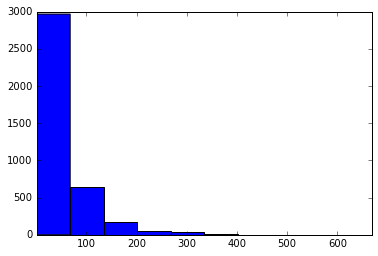

In [4]:
# Compute histogram of accident counts.
accident_numbers_list = list(agg_accident_data.values())
print(min(accident_numbers_list))
print(max(accident_numbers_list))
plt.xlim(min(accident_numbers_list), max(accident_numbers_list))
plt.hist(accident_numbers_list)
plt.show()

0
667966


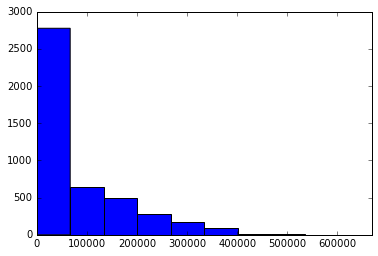

In [6]:
# Compute histogram of traffic counts.
traffic_numbers_list = list(agg_traffic_data.values())
print(min(traffic_numbers_list))
print(max(traffic_numbers_list))
plt.xlim(min(traffic_numbers_list), max(traffic_numbers_list))
plt.hist(traffic_numbers_list)
plt.show()

2.904325702701604e-06
1.0


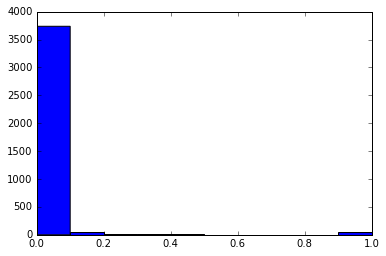

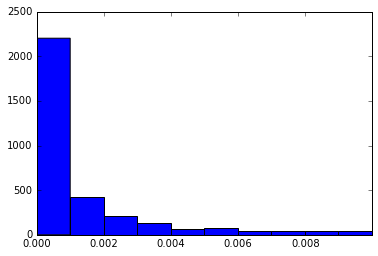

In [11]:
# Compute scores.
scores = []
for k, num_accidents in agg_accident_data.items():
    if (num_accidents > 0):
        node = nodes_to_coord_data[k]
        node_id = node[0]
        # Get amount of traffic at that node.
        traffic = agg_traffic_data[node_id]
        # There are some weird cases where traffic is 0 but accidents is > 0.
        # For now, we update traffic to equal the num_accidents.
        # Maybe this assumption should be revisited?
        if (traffic < num_accidents):
            traffic = num_accidents
        # Calculate intersection score.
        score = num_accidents/traffic
        scores.append(score)

# Compute histogram of scores.
print(min(scores))
print(max(scores))
plt.xlim(min(scores), max(scores))
plt.hist(scores)
plt.show()

# Compute histogram of scores after filtering out high scores.
filtered_scores = [x for x in scores if x < 0.01]
plt.xlim(min(filtered_scores), max(filtered_scores))
plt.hist(filtered_scores)
plt.show()

In [22]:
# Map data.

# Change this to false if you want to generate the full dataset.
sampleData = True
sampleSize = 100

# Starting coordinates to load map view.
NYC_coordinates = (40.7142700, -74.0059700)

# Create Map object.
agg_map = folium.Map(location=NYC_coordinates,
                     zoom_start=12)

# Plot data.
marker_cluster = folium.MarkerCluster().add_to(agg_map)
for k, num_accidents in agg_accident_data.items():
    if (sampleData and k > sampleSize):
        break;
    if (num_accidents > 0):
        # Get lat/long of node.
        node = nodes_to_coord_data[k]
        node_id = node[0]
        lat = node[1]['lat']
        lon = node[1]['lon']

        # Get amount of traffic at that node.
        traffic = agg_traffic_data[node_id]
        # There are some weird cases where traffic is less than the num accidents.
        # For now, we update traffic to equal the num_accidents.
        # Maybe this assumption should be revisited?
        if (traffic < num_accidents):
            traffic = num_accidents
            
        # Calculate intersection score.
        score = num_accidents/traffic

        # Plot point.
        node_metadata = """
                    <ul>
                        <li><strong>Num accidents</strong>: {0}</li>
                        <li><strong>Traffic</strong>: {1}</li>
                        <li><strong>Score</strong>: {2}</li>
                    </ul>""".format(
                str(num_accidents), str(traffic), str(score))
        iframe = folium.element.IFrame(html=node_metadata, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)
        score_color = "red"
        if (score > 0.001 and score < 0.01):
            score_color = "blue"
        if (score <= 0.001):
            score_color = "green"
        folium.Marker(
                location = [lat, lon],
                icon = folium.Icon(color=score_color, icon='asterisk'),
                popup=popup).add_to(marker_cluster)

# Only print the map in the notebook if sampling is on.
# Otherwise, it will crash your notebook.
# If not sampling the data, run the method in the next section
# to write out the generated html file and open that to see the results.
if (sampleData):
    display(agg_map)

In [15]:
# Save html version of map.
agg_map.save('agg_accidents_map.html')